In [18]:
import numpy as np
import cv2
import pandas as pd
import os
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from detect_sign import detect_sign

# physical_devices = tf.config.list_physical_devices('GPU') 
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [19]:
def grayscale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img

def equalize(img):
    img = cv2.equalizeHist(img)
    return img

def sobel(img):
    grad_x = cv2.Sobel(img, cv2.CV_64F, 1, 0)
    grad_y = cv2.Sobel(img, cv2.CV_64F, 0, 1)
    grad = np.sqrt(grad_x ** 2 + grad_y ** 2)
    img = (grad * 255 / grad.max()).astype(np.uint8)
    return img

def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    # img = sobel(img)
    img = img / 255       
    return img

In [20]:
className = []
labelFile = "chinese_dataset/labels.csv"
data = pd.read_csv(labelFile)

for _, row in data.iterrows():
    className.append(row["Name"])

In [21]:
modelPath = "trained_model_chinese_local"
model = keras.models.load_model(modelPath)

In [22]:
testImagePath = "test_images_chinese_road_sign"
imagePathList = os.listdir(testImagePath)
images = []

for x in imagePathList:
    img = cv2.imread(os.path.join(testImagePath, str(x)))

    x, y, w, h = detect_sign(img)

    if x and y and w and h:
        images.append(img[y:y + h, x:x + w])

images = np.array(images)

<ipython-input-22-6e76a74358ad>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  images = np.array(images)


/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
Predict Success?
Tulisan China merah ( 99.99972581863403 )


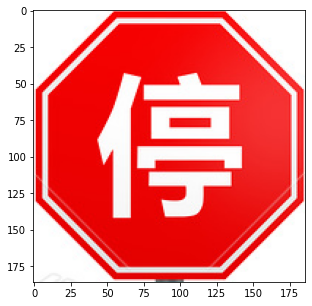

Predict Success?
Huruf China ( 95.6810474395752 )


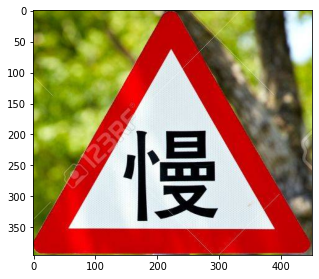

Predict Success?
Silang merah background biru ( 99.39223527908325 )


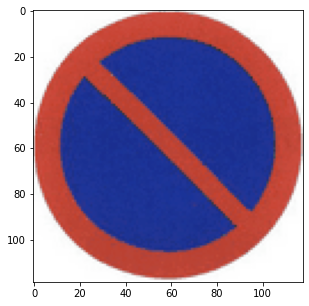

Predict Success?
Tulisan China merah ( 100.0 )


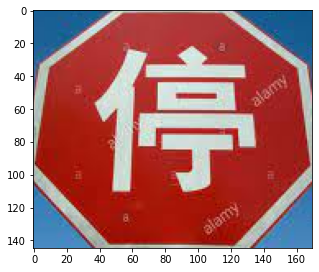

Panah arah tenggara ( 59.08936858177185 )


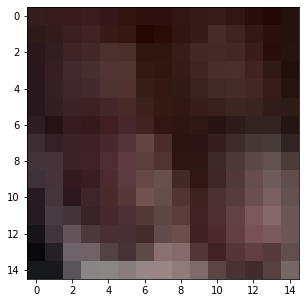

Predict Success?
Tulisan China Segitiga ( 100.0 )


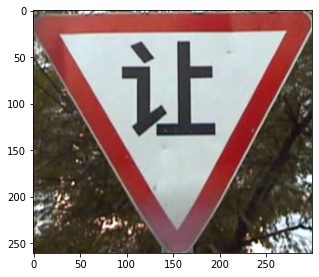

Predict Success?
Silang merah background biru ( 99.95691180229187 )


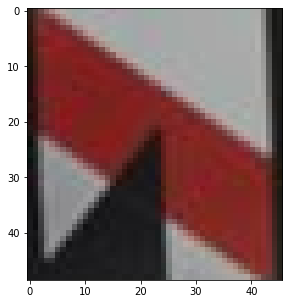

Predict Success?
Dilarang mendahului ( 99.97199177742004 )


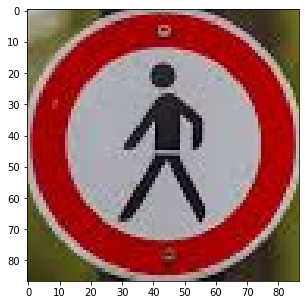

Predict Success?
Boleh belok kanan ( 99.913090467453 )


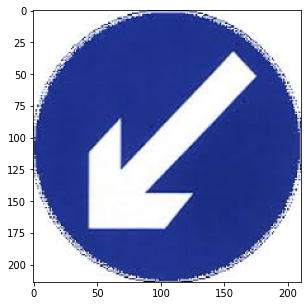

Predict Success?
Dilarang klakson ( 100.0 )


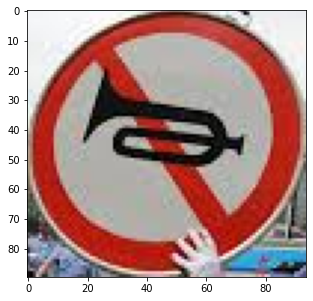

Predict Success?
Dilarang klakson ( 100.0 )


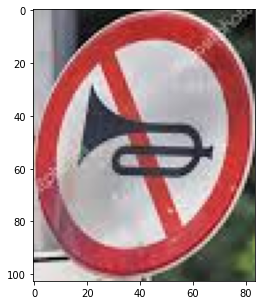

Predict Success?
Sepeda boleh masuk ( 99.37164187431335 )


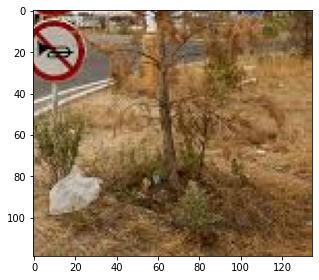

Predict Success?
Speed 30 kmh ( 100.0 )


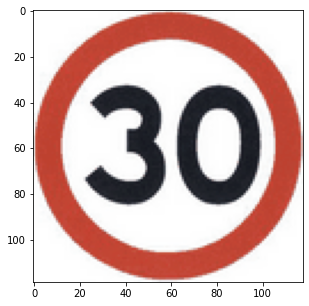

In [23]:
predictionThreshold = 0.7

for img in images:
    originalImage = img.copy()

    img = cv2.resize(img, (32, 32))
    img = preprocessing(img)
    img = img.reshape(1, 32, 32, 1)

    predictions = model.predict(img)
    classIndex = model.predict_classes(img)
    probabilityValue = np.amax(predictions)

    if probabilityValue > predictionThreshold:
        print("Predict Success?")
        print(className[int(classIndex)], "(", probabilityValue * 100, ")")
    else:
        print(className[int(classIndex)], "(", probabilityValue * 100, ")")

    plt.figure(figsize = (5, 5))
    plt.imshow(cv2.cvtColor(originalImage, cv2.COLOR_BGR2RGB))
    plt.show()